# Ohio 2022 PBER

From Geoff: “What I would like by June 20th is a csv that assigns each 2020 Census block to a 2022 precinct from the Ohio SoS's general election results file.”

To Geoff: “…We've decided to start processing the shapefiles now so that there'll be minimal lag time between collection and release of the file. Although I don't anticipate this, in a worst case scenario, we'd be happy to share with you whatever intermediate file we have by June 20th.”

## Fine to use 2020 data vs Need digitization tracking

- * indicates adopted pre-2020 and therefore no updates needed
- P indicates the collection team only found PDF maps, no geospatial data

* ashtabula - used for 10 years except for single parcel change 1/24/23 in Orwell TWP/Orwell Vill
* P adams - not changed for 2022, not sure when first adopted
(P allen - map dated 9-28-21)
* athens - adopted in 2011
* P auglaize - date stamped 9/26/06
* belmont - adopted 2012/updated 2019
brown - adopted 5-21
butler - adopted 2-22
* P carrol - adopted 2019 or earlier
* P champaign - adopted 5-18
* P clinton - no change for 2022, not sure when first adopted
clark - adopted early 2022
clermont - adopted early 2022
columbiana - adopted 11-21
* P coshockton - no change for 2022, not sure when first adopted
* P crawford - no change for 2022, not sure when first adopted
cuyahoga - not sure when adopted
* P darke - no change for 2022, not sure when first adopted
* P defiance - first adopted 2018
delaware - adopted 2-2022
erie - adopted 1-2021
* fairfield - first adopted 2019
* fayette - adopted 2019 or earlier
* franklin - first adopted 8-2019
* fulton - first adopted 1-2019
* P gallia - no change for 2022, not sure when first adopted
geauga - first adopted 9-2021
* P greene - first adopted 2015, used 2020
* P guernsey - adopted 2005
hamilton - adopted early 2022
* hancock - adopted 2-2020, same map as 2020
hardin - no change for 2022, not sure when first adopted
* P harrison - wip, first adopted 2010
* henry - first adopted 1-2019
* highland - first adotped 2018 - cant be used but do match 2020 seems
hocking - first adopted 2021/2022
* holmes - first adopted 1/1/14
(P huron - first adoped 3/17 or 2021, based on map date stamp vs BOE director)
* P jackson - "many years ago"
* jefferson - adopted 2012
* knox - adopted 11/2019
* lawrence - precinct havent changed in 20 years, they claim
lake - first adopted 2021
* licking - first adopted 2015
* logan - "Used the 2018 map for all three 2022 elections"
* lorain - adopted after 2022 general election (so ...2022 general and prim used 2020 precs?)
* lucas - adopted 2019
(P madison - adopted 2022 (before or after elections?))
* mahoning - adopted 2012
* marion - adopted august 2015 used for primary elections, august 2022 map used for gen elec
medina - no info in metadata on previous use
* meigs - no change for 2022 - think this means same as 2020
mercer - new for 2022
miami - new for 2022
* monroe - adopted pre-2018
* P morgan - adopted pre-2019
* morrow - adopted 2017 or earlier
montgomery - adopted march 2022, used in primaries too
muskingum - adopted 2022
* noble - no 2022 changes, think this means same as 2020
* ottawa - adopted December 2022, so I think 2020 map likely used for actual elections?
* paulding - adopted pre 2020
* perry - adopted 2013
pickaway - adopted early 2022
* P pike - adopted 2002
portage - adopted 2022 for general, 2017 for primary
* P preble - no 2022 changes, so I think 2020 map works
* putnam - no 2022 changes, stamped 2019 - given other spots that say "before 2020" not sure
* richland - adopted 2018 or earlier
* ross - adopted 2013
* P sandusky - adopted 2009
* P scioto - adopted before 2020
* shelby - adopted before 2020
stark - adopted 2022
* summit - adopted 2013, a change in 2017 (and dec 2022?)
tuscarawas - adopted between 2020 and 2022
* union - adopted 2019
* P vanwert - adopted pre-2020
* P vinton - adopted pre-2020
* warren - adopted pre-2020
* washington - adopted 2016 or earlier
* wayne - adopted 2015, some updates since (not nec any one shp ever used??)
* williams - adopted pre-2019
wood - adopted early 2022
* P wyandot - adopted 2019 - one 2022 update due to cong split (?)

## Imports libraries and 2022 Election Results

In [2]:
import os
import geopandas as gp
import pandas as pd
from op_verification import reference_data


#set of counties with new precinct boundaries since 2020 and therefore new precinct name matching required
prec_counties_new22_set = {"brown","butler","clark","clermont","columbiana","cuyahoga","delaware", "erie","geauga","hamilton","hardin", 
                           "hocking","lake","lucas","lorain","marion","medina","mercer","miami","montgomery","muskingum","pickaway","portage",
                           "stark","tuscarawas","wood"}

#Removed from above set after checking pdf map with 2020 map by SN on 6/7: ,"madison", "huron"
#Removed because no 2022 available and statement that no changes since 2020: "allen"
print(len(prec_counties_new22_set))


#2022 precinct eletion results, no geospatial data
er22 = pd.read_csv('./oh_2022_gen_prec/oh_2022_gen_prec.csv')

26


## Compare 2020 boundary precincts to 2022 election result precincts

In [75]:
#2020 precinct boundaries and election results file filtered for only boundaries
bound20rdh = gp.read_file("./oh_gen_20_prec/oh_gen_20_st_prec.shp")[['UNIQUE_ID', "STATEFP20","COUNTYFP20", "PRECINCT20","NAME20","geometry"]]

#Format county/county name columns to maptch ER22 for comparison
bound20rdh['COUNTY'] = ("39"+bound20rdh['COUNTYFP20']).map(reference_data.geoid_to_county_name)
bound20rdh['COUNTYNM'] = bound20rdh['COUNTY'].str.lower().str.slice(stop=-7)
county_name_to_fips_dict = pd.Series(bound20rdh['COUNTYFP20'].values, index=bound20rdh['COUNTYNM']).to_dict()

#Confirm county names match up
assert set(bound20rdh['COUNTYNM'])-set(er22["County"].str.lower()) == set()
assert set(er22["County"].str.lower())-set(bound20rdh['COUNTYNM']) == set()

#Note "ZZZ"/"VOTING DISTRICTS NOT DEFINED" refers to water areas with no precinct but should be included in the map

In [76]:
county_name_to_fips_dict 

{'athens': '009',
 'union': '159',
 'butler': '017',
 'clark': '023',
 'wood': '173',
 'holmes': '075',
 'fairfield': '045',
 'shelby': '149',
 'logan': '091',
 'ashtabula': '007',
 'knox': '083',
 'scioto': '145',
 'auglaize': '011',
 'clermont': '025',
 'guernsey': '059',
 'wyandot': '175',
 'gallia': '053',
 'crawford': '033',
 'hocking': '073',
 'morgan': '115',
 'monroe': '111',
 'madison': '097',
 'williams': '171',
 'ashland': '005',
 'delaware': '041',
 'huron': '077',
 'jackson': '079',
 'washington': '167',
 'trumbull': '155',
 'highland': '071',
 'noble': '121',
 'ross': '141',
 'clinton': '027',
 'stark': '151',
 'preble': '135',
 'medina': '103',
 'fayette': '047',
 'lorain': '093',
 'defiance': '039',
 'miami': '109',
 'ottawa': '123',
 'hamilton': '061',
 'van wert': '161',
 'mahoning': '099',
 'coshocton': '031',
 'pickaway': '129',
 'hardin': '065',
 'putnam': '137',
 'carroll': '019',
 'meigs': '105',
 'lawrence': '087',
 'geauga': '055',
 'darke': '037',
 'fulton': '

<AxesSubplot:>

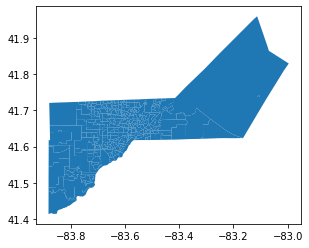

In [49]:
bound20rdh[bound20rdh["COUNTYNM"].str.upper()=="LUCAS"].plot()

<AxesSubplot:>

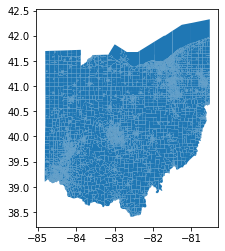

In [50]:
bound20rdh[bound20rdh["COUNTYNM"].str.upper()!="LUCAS"].plot()

In [4]:
#Considering 2020/2022 comparison some more
print("unique_id nunique: ",er22["UNIQUE_ID"].nunique() ,"shape: ", er22["UNIQUE_ID"].shape, "prec name nunique: ", er22["PRECNAME"].nunique())
print(bound20rdh.shape, bound20rdh["NAME20"].nunique(), bound20rdh["PRECINCT20"].nunique())
print((er22["PRECCODE"]+er22["County"]).nunique())
print((bound20rdh["PRECINCT20"]+bound20rdh["COUNTYNM"]).nunique())
'''
Bounds have more unique, but also includes the ZZZ dist, which includes precincts with 0 voters, so should be ok/expected
#I can join the er and bounds on preccode/county, then still use PRECNAME/UNIQUE_ID from og er
Include zzz vtd shapes with note in readme that they were not assigned votes
OR export those shapes separately, see if they even have area/meaning'''

unique_id nunique:  8933 shape:  (8933,) prec name nunique:  8760
(8941, 8) 8673 1550
8933
8941


'\nBounds have more unique, but also includes the ZZZ dist, so should be ok/expected\n#I can join the er and bounds on preccode/county, then still use PRECNAME/UNIQUE_ID from og er\nInclude zzz vtd shapes with note in readme that they were not assigned votes\nOR export those shapes separately, see if they even have area/meaning'

In [6]:
#set of counties with reused precinct boundaries from pre-2020, therefore can use 2020 geospatial data
counties_reused22_set = set(er22["County"].str.lower())-prec_counties_new22_set

#2022 ER df subset counties where geospatial data can be reused
er22_reused_counties_df = er22[er22["County"].str.lower().isin(counties_reused22_set)]

#2020 Bound gdf subset counties where geospatial data can be reused
bound20_reused_counties_gdf = bound20rdh[(bound20rdh["COUNTYNM"].isin(counties_reused22_set))|(bound20rdh["PRECINCT20"]=="ZZZ")]


#Check if Precincts line up/what mismatches
#print("\n","prec diff: bound comp er len: ", len(set(bound20_reused_counties_gdf["PRECINCT20"])-set(er22_reused_counties_df["PRECCODE"])))
#print("prec diff: bound comp er names: ", set(bound20_reused_counties_gdf["PRECINCT20"])-set(er22_reused_counties_df["PRECCODE"]))
#print("prec diff: er comp bound len: ", len(set(er22_reused_counties_df["PRECCODE"])-set(bound20_reused_counties_gdf["PRECINCT20"])))
print("\n prec w/county diff: bound comp er len: ", len(set(bound20_reused_counties_gdf["PRECINCT20"]+bound20_reused_counties_gdf["COUNTYNM"].str.lower())-set(er22_reused_counties_df["PRECCODE"]+er22_reused_counties_df["County"].str.lower())))
print("prec w/county diff: er comp bound len: ", len(set(er22_reused_counties_df["PRECCODE"]+er22_reused_counties_df["County"].str.lower())-set(bound20_reused_counties_gdf["PRECINCT20"]+bound20_reused_counties_gdf["COUNTYNM"])))
print("prec county diff: er comp bound names: ", set(er22_reused_counties_df["PRECCODE"]+er22_reused_counties_df["County"].str.lower())-set(bound20_reused_counties_gdf["PRECINCT20"]+bound20_reused_counties_gdf["COUNTYNM"]))
print("prec county diff: bound comp er names: ", set(bound20_reused_counties_gdf["PRECINCT20"]+bound20_reused_counties_gdf["COUNTYNM"].str.lower())-set(er22_reused_counties_df["PRECCODE"]+er22_reused_counties_df["County"].str.lower()))


 prec w/county diff: bound comp er len:  8
prec w/county diff: er comp bound len:  0
prec county diff: er comp bound names:  set()
prec county diff: bound comp er names:  {'ZZZcuyahoga', 'ZZZashtabula', 'ZZZlake', 'ZZZlucas', 'ZZZottawa', 'ZZZportage', 'ZZZerie', 'ZZZlorain'}


In [7]:
#Create common column to join on
er22_reused_counties_df["UNIQUE_ID_code"] = er22_reused_counties_df["County"].str.upper() + "-"+er22_reused_counties_df["PRECCODE"]
bound20_reused_counties_gdf["UNIQUE_ID_code"] = bound20_reused_counties_gdf["COUNTYNM"].str.upper()+"-"+bound20_reused_counties_gdf["PRECINCT20"]

#Join 2020 bounds with 2022 ER where appropriate
pber_prec_reused_gdf = pd.merge(er22_reused_counties_df, bound20_reused_counties_gdf, on = "UNIQUE_ID_code", how = "outer", indicator=True)

<ipython-input-7-a08fc4c12583>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  er22_reused_counties_df["UNIQUE_ID_code"] = er22_reused_counties_df["County"].str.upper() + "-"+er22_reused_counties_df["PRECCODE"]
/Users/lilyfalk/anaconda3/envs/hdv_env/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [8]:
print("all: ",pber_prec_reused_gdf.shape, "\nunmatched: ",pber_prec_reused_gdf[pber_prec_reused_gdf["_merge"]!="both"].shape)

print("county from er not matching: ",pber_prec_reused_gdf["County"][pber_prec_reused_gdf["_merge"]!="both"].unique())
print("county from bound not matching, not zzz: ",pber_prec_reused_gdf["COUNTYNM"][(pber_prec_reused_gdf["_merge"]!="both")&(pber_prec_reused_gdf["PRECINCT20"]!="ZZZ")].unique())

all:  (4375, 269) 
unmatched:  (8, 269)
county from er not matching:  [nan]
county from bound not matching, not zzz:  []


## Precinct name matching 2022

**Full Match:** 
- precinct names match 2022 ER, precinct names are unique identifiers within the county

**Too many polygons:** 
- precinct names match 2022 ER, precinct names are unique within county in ER, NOT in PB - no identifier to differentiate in PB other than geometry col
- to solve: dissolve by precinct name which matches with ER

**WIP/unanswered Qs:** Reached out to Geoff for some direction in case he has more info
- More polygons with unique precinct names in 2022 Precinct Boundary (PB) file than in 2022 Election Results (ER) File
    - Impacts: Butler, Cuyahoga
    - Proposed Solution: In cases where a precinct is split, merge together to match the ER
        - Example: In Butler County the Precinct Boundaries contain ( 'TRENTON1.MAD','TRENTON1.TRE') whereas the election results just contain 'TRENTON1'
        - In this case MAD and TRE in TRENTON1 would get merged together..
- Number of unique precinct names in boundary file does not match # polygons OR # unique precinct names in ER file
    - Impacts: Pickaway
    - Explanation: Boundary file has 77 rows, 35 unique precinct names, election results file has 43 unique precinct names
    - Solution: ?
- A few names with no match
    - Impacts: Erie, Stark 
    - Explanation: Erie (what to do with "Bellevue City-Annexed-Refer to Board of Elections" from boundary file?), Stark (what do do with "Perry 20" from boundary file and "North Canton 2-D" from Election Results file while all other names match?)
    - Solution: ?
- No names match
    - Impacts: Wood
    - Explanation: After reading in all of the precinct shapes that the county provided separately, the precinct identifier is a number in the boundary file that does not match any of the identifiers in the election results
    - Solution: ?
    
- All names match, but null names in PB cause holes in plot
    - Impacts: Portage
    - Explanation: There are 129 precinct names in the ER. There are 129 names in PB that match ER. See plot below for missing section and df print out for which names leading to issues
    - Solution: Merge with other part of precinct/name? Problem is how to know which is correct


In [10]:
len(prec_counties_new22_set)

26

In [11]:
prec_counties_new22_set

{'brown',
 'butler',
 'clark',
 'clermont',
 'columbiana',
 'cuyahoga',
 'delaware',
 'erie',
 'geauga',
 'hamilton',
 'hardin',
 'hocking',
 'lake',
 'lorain',
 'lucas',
 'marion',
 'medina',
 'mercer',
 'miami',
 'montgomery',
 'muskingum',
 'pickaway',
 'portage',
 'stark',
 'tuscarawas',
 'wood'}

In [12]:
def check_precid_uniqueness(county_df_list):
    print("number of counties in list: ",len(county_df_list))
    for county in county_df_list:
        print("check prec_id for: ", county["county"][0])
        assert set(county["prec_id"])-set(er22["PRECNAME"][er22["County"].str.upper()==county["county"][0]])==set(er22["PRECNAME"][er22["County"].str.upper()==county["county"][0]])-set(county["prec_id"])==set()


### Full Match

In [13]:
#Clark: Full match
clark = gp.read_file("./boundaries/clark_precincts_2023/ClarkCountyPrecinctData.shp")
clark['prec_id'] = "PRECINCT "+clark['NAME']
clark.loc[clark['NAME'].str.contains("BETHEL"), "prec_id"] = clark['prec_id'].str.replace("BETHEL", "BETH")
clark.loc[clark['NAME'].str.contains(" 0"), "prec_id"] = clark['prec_id'].str.replace(" 0", " ")
clark.loc[clark['NAME'].str.contains("MR "), "prec_id"] = clark['prec_id'].str.replace("MR ", "MR-")
clark.loc[clark['NAME'].str.contains("HARMONY"), "prec_id"] = clark['prec_id'].str.replace("HARMONY", "HARM")
clark.loc[clark['NAME'].str.contains("T-0"), "prec_id"] = clark['prec_id'].str.replace("T-0", "T-")
clark.loc[clark['NAME'].str.contains("GERMAN"), "prec_id"] = clark['prec_id'].str.replace("GERMAN", "GERM")
clark.loc[clark['NAME'].str.contains("GREEN"), "prec_id"] = clark['prec_id'].str.replace("GREEN", "GREE")
clark['county'] = 'CLARK'
clark['UNIQUE_ID'] = clark['county']+"-"+clark["prec_id"]
clark = clark.to_crs(bound20_reused_counties_gdf.crs)


#Columbiana: Full match
columbiana = gp.read_file("./boundaries/columbiana_precincts_2022/Voting_Precincts_2022.shp")
columbiana_dict = {"HANOVER TWP NW":'PRECINCT HANOVER TWP NORTH',"WELLSVILLE 2":'PRECINCT WELLSVILLE  2',"PERRY SW":'PRECINCT PERRY TWP SW',
                   "PERRY NORTH":'PRECINCT PERRY TWP NORTH',"LEETONIA":'PRECINCT LEETONIA VIL', "NEGLEY":'PRECINCT MIDDLETON TWP NEGLEY',
                   "ROGERS":'PRECINCT MIDDLETON TWP ROGERS',"ST CLAIR SOUTH":'PRECINCT ST CLAIR TWP SOUTH',
                   "WEST TWP E ROCHESTER":'PRECINCT WEST TWP EAST ROCHESTER',"WELLSVILLE 1":'PRECINCT WELLSVILLE  1'}
columbiana["prec_id"] = "PRECINCT "+columbiana["PRECNAME"].str.upper().str.replace("TOWNSHIP", "TWP")
columbiana.loc[columbiana["PRECNAME"].isin(columbiana_dict.keys()), "prec_id"] = columbiana["PRECNAME"].map(columbiana_dict)
columbiana["county"] = "COLUMBIANA"
columbiana["UNIQUE_ID"] = columbiana["county"]+"-"+columbiana["prec_id"]
columbiana = columbiana.to_crs(bound20_reused_counties_gdf.crs)


#Delaware: Full match
delaware = gp.read_file("./boundaries/delaware_precincts_2022/Precinct.shp")
delaware['prec_id'] = "PRECINCT " + delaware['PREC_NAME'].str.upper()
delaware["county"] = "DELAWARE"
delaware.loc[delaware["PREC_NAME"].str.contains("COLUMBUS"), "prec_id"] = "PRECINCT "+delaware["PREC_NAME"].str.replace("COLUMBUS ", "COLUMBUS CITY ")
delaware.loc[delaware["PREC_NAME"].str.contains("DUBLIN"), "prec_id"] = "PRECINCT "+delaware["PREC_NAME"].str.replace("DUBLIN ", "DUBLIN CITY ")
delaware.loc[delaware["PREC_NAME"].str.contains("POWELL"), "prec_id"] = "PRECINCT "+delaware["PREC_NAME"].str.replace("POWELL ", "POWELL CITY ")
delaware.loc[delaware["PREC_NAME"].str.contains("SUNBURY"), "prec_id"] = "PRECINCT "+delaware["PREC_NAME"].str.replace("SUNBURY ", "SUNBURY CITY ")
delaware.loc[delaware["PREC_NAME"].str.contains("WESTERVILLE"), "prec_id"] = "PRECINCT "+delaware["PREC_NAME"].str.replace("WESTERVILLE ", "WESTERVILLE CITY ")
delaware["UNIQUE_ID"] = delaware["county"]+"-"+delaware["prec_id"]
delaware = delaware.to_crs(bound20_reused_counties_gdf.crs)


#Geauga: Full Match
geauga = gp.read_file("./boundaries/geauga_precincts_2022/Precincts.shp")
geauga_prec_dict = {"B-76":"PRECINCT THOMPSON TWP B","B-51":"PRECINCT MONTVILLE TWP B", "C-42":"PRECINCT HAMBDEN TWP C", "A-23":"PRECINCT CHARDON TWP A","D-22":"PRECINCT CHARDON CITY D", "A-44":"PRECINCT HUNTSBURG TWP A", "B-38":"PRECINCT CLARIDON TWP B", "E-56":"PRECINCT MUNSON TWP E",
"D-30":"PRECINCT CHESTER TWP D","AQV-36":"PRECINCT AQUILLA VILLAGE", "B-49":"PRECINCT MIDDLEFIELD TWP B", "C-18":"PRECINCT BURTON TWP C", "A-58":"PRECINCT NEWBURY TWP A", "A-70":"PRECINCT RUSSELL TWP A", "HVV-69":"PRECINCT HUNTING VALLEY VILL", 
"B-47":"PRECINCT MIDDLEFIELD VILL B",
"BUR V-15":"PRECINCT BURTON VILLAGE", "B-64":"PRECINCT PARKMAN TWP B", "A-77":"PRECINCT TROY TWP A", "E-5":"PRECINCT AUBURN TWP E","F-11":"PRECINCT BAINBRIDGE TWP F", "A-75":"PRECINCT THOMPSON TWP A", "A-50":"PRECINCT MONTVILLE TWP A", "B-45":"PRECINCT HUNTSBURG TWP B", 
"A-46":"PRECINCT MIDDLEFIELD VILL A", "A-63":"PRECINCT PARKMAN TWP A", "B-78":"PRECINCT TROY TWP B", "A-16":"PRECINCT BURTON TWP A", "B-17":"PRECINCT BURTON TWP B", "A-37":"PRECINCT CLARIDON TWP A", "B-41":"PRECINCT HAMBDEN TWP B", "A-40":"PRECINCT HAMBDEN TWP A",
"D-43":"PRECINCT HAMBDEN TWP D", "C-25":"PRECINCT CHARDON TWP C","D-26":"PRECINCT CHARDON TWP D", "B-24":"PRECINCT CHARDON TWP B", "A-19":"PRECINCT CHARDON CITY A", "C-21":"PRECINCT CHARDON CITY C", "B-20":"PRECINCT CHARDON CITY B", "B-53":"PRECINCT MUNSON TWP B", 
"C-54":"PRECINCT MUNSON TWP C","F-57":"PRECINCT MUNSON TWP F", "B-59":"PRECINCT NEWBURY TWP B", "C-60":"PRECINCT NEWBURY TWP C", "E-62":"PRECINCT NEWBURY TWP E","D-61":"PRECINCT NEWBURY TWP D", "C-3":"PRECINCT AUBURN TWP C", "B-2":"PRECINCT AUBURN TWP B", 
"A-1":"PRECINCT AUBURN TWP A","D-4":"PRECINCT AUBURN TWP D", "A-6":"PRECINCT BAINBRIDGE TWP A", "C-8":"PRECINCT BAINBRIDGE TWP C", "E-10":"PRECINCT BAINBRIDGE TWP E","H-13":"PRECINCT BAINBRIDGE TWP H","I-14":"PRECINCT BAINBRIDGE TWP I","D-9":"PRECINCT BAINBRIDGE TWP D",
"D-68":"PRECINCT SOUTH RUSSELL VILL D", "B-66":"PRECINCT SOUTH RUSSELL VILL B", "A-65":"PRECINCT SOUTH RUSSELL VILL A", "C-67":"PRECINCT SOUTH RUSSELL VILL C", "E-74":"PRECINCT RUSSELL TWP E", "C-72":"PRECINCT RUSSELL TWP C", "B-71":"PRECINCT RUSSELL TWP B",
"D-73":"PRECINCT RUSSELL TWP D", "C-29":"PRECINCT CHESTER TWP C","G-33":"PRECINCT CHESTER TWP G","H-34":"PRECINCT CHESTER TWP H","I-35":"PRECINCT CHESTER TWP I", "A-27":"PRECINCT CHESTER TWP A", "B-28":"PRECINCT CHESTER TWP B", "E-31":"PRECINCT CHESTER TWP E",
"F-32":"PRECINCT CHESTER TWP F", "B-7":"PRECINCT BAINBRIDGE TWP B","G-12":"PRECINCT BAINBRIDGE TWP G","D-55":"PRECINCT MUNSON TWP D", "A-52":"PRECINCT MUNSON TWP A", "C-39":"PRECINCT CLARIDON TWP C", "A-48":"PRECINCT MIDDLEFIELD TWP A"}
geauga["prec_id"] = "na"
geauga.loc[geauga['PRECINCT2'].isin(geauga_prec_dict.keys()), "prec_id"] = geauga["PRECINCT2"].map(geauga_prec_dict)
geauga["county"] = "GEAUGA"
geauga["UNIQUE_ID"] = geauga["county"]+"-"+geauga["prec_id"]
geauga = geauga.to_crs(bound20_reused_counties_gdf.crs)


#Hamilton: Full Match
hamilton = gp.read_file("./boundaries/hamilton_precincts_2022/PRECINT2021_0311.shp")
hamilton['prec_id'] = hamilton["PRC_NAME"]
hamilton['county'] = "HAMILTON"
hamilton["UNIQUE_ID"] = hamilton["county"]+"-"+hamilton["prec_id"]
hamilton = hamilton.to_crs(bound20_reused_counties_gdf.crs)


#Hardin: Full Match
hardin = gp.read_file("./boundaries/hardin_precincts_2022/Hardin_Co_Precincts_2023-04.shp")
hardin["prec_id"] = hardin["precinct"].str.upper()
hardin["county"] = "HARDIN"
hardin["UNIQUE_ID"] = hardin["county"]+"-"+hardin["prec_id"]
hardin = hardin.to_crs(bound20_reused_counties_gdf.crs)


#Hocking: Full Match
hocking = gp.read_file("./boundaries/hocking_precincts_2022/HOCKING_COUNTY_PRECINCTS_2022.shp")
hocking["prec_id"] = "PRECINCT " + hocking["PRECINCT"]
hocking.loc[hocking["PRECINCT"]=="SALT CREEK", "prec_id"] = "PRECINCT SALTCREEK"
hocking["county"] = "HOCKING"
hocking["UNIQUE_ID"] = hocking["county"]+"-"+hocking["prec_id"]
hocking = hocking.to_crs(bound20_reused_counties_gdf.crs)


#Lake: Full Match
lake = gp.read_file("./boundaries/lake_precincts_2021/Lake_County_Voting_Precincts_(2021).shp")
lake["prec_id"] = lake["NAME"].str.upper()
lake.loc[~lake["NAME"].str.upper().str.contains("MENTOR-ON"), "prec_id"] = "PRECINCT "+lake["NAME"].str.upper()
lake.loc[lake["NAME"].str.upper().str.contains("MENTOR-ON"), "prec_id"] = lake["NAME"].str.upper().str.slice(stop=-2)+"CITY "+lake["NAME"].str.upper().str.slice(start=-2)
lake["county"] = "LAKE"
lake["UNIQUE_ID"] = lake["county"]+"-"+lake["prec_id"]
lake = lake.to_crs(bound20_reused_counties_gdf.crs)


#Marion: Full Match
marion_aug=gp.read_file("./boundaries/marion_precincts_2022/MARION_COUNTY_PRECINCTS_CONSOLIDATED_AUG2022.shp")
marion_dec = gp.read_file("./boundaries/marion_precincts_2022/City_Council_Wards_December2022.shp")
marion_dec["PRCT_NAME"] = "MARION " + marion_dec["WARD_ID"].astype(str)+"-"+marion_dec["Prect"]
marion = gp.GeoDataFrame(pd.concat([marion_aug, marion_dec], ignore_index=True), crs=bound20_reused_counties_gdf.crs)
marion["prec_id"] = "PRECINCT "+marion["PRCT_NAME"]
marion_dict = {'PRECINCT BIG ISLAND':'PRECINCT BIG ISLAND TWP','PRECINCT BOWLING GREEN':'PRECINCT BOWLING GREEN TWP',
               'PRECINCT CLARIDON A':'PRECINCT CLARIDON TWP A','PRECINCT CLARIDON B':'PRECINCT CLARIDON TWP B',
               'PRECINCT GRAND PRAIRIE':'PRECINCT GRAND PRAIRIE TWP','PRECINCT GRAND-SALT':'PRECINCT GRAND SALT',
               'PRECINCT GREEN CAMP':'PRECINCT GREEN CAMP TWP','PRECINCT MARION A':'PRECINCT MARION TWP A','PRECINCT MARION B':'PRECINCT MARION TWP B',
               'PRECINCT MARION C':'PRECINCT MARION TWP C','PRECINCT MARION D':'PRECINCT MARION TWP D','PRECINCT MARION E':'PRECINCT MARION TWP E',
               'PRECINCT MARION F':'PRECINCT MARION TWP F','PRECINCT MONTGOMERY':'PRECINCT MONTGOMERY TWP','PRECINCT PLEASANT A':'PRECINCT PLEASANT TWP A',
               'PRECINCT PLEASANT B':'PRECINCT PLEASANT TWP B','PRECINCT PLEASANT C':'PRECINCT PLEASANT TWP C','PRECINCT PLEASANT D':'PRECINCT PLEASANT TWP D',
               'PRECINCT PROSPECT':'PRECINCT PROSPECT TWP','PRECINCT RICHLAND A':'PRECINCT RICHLAND TWP A','PRECINCT RICHLAND B':'PRECINCT RICHLAND TWP B',
               'PRECINCT SCOTT-TULLY':'PRECINCT SCOTT TULLY','PRECINCT WALDO':'PRECINCT WALDO TWP'}
marion.loc[marion["prec_id"].isin(marion_dict), "prec_id"] = marion["prec_id"].map(marion_dict)
marion["county"] = "MARION"
marion["UNIQUE_ID"] = marion["county"]+"-"+marion["prec_id"]
marion = marion.to_crs(bound20_reused_counties_gdf.crs)


#Mercer: Full Match
mercer = gp.read_file("./boundaries/mercer_precincts_2023/2023_03_votingprecincts.shp")
mercer["prec_id"] = mercer["NAME"]
mercer["county"] = "MERCER"
mercer["UNIQUE_ID"] = mercer["county"]+"-"+mercer["prec_id"]
mercer = mercer.to_crs(bound20_reused_counties_gdf.crs)


#Muskingum: Full match
muskingum = gp.read_file("./boundaries/muskingum_precincts_2022/VOTING_PRECINCTS.shp")
muskingum_dict = {'1A': 'PRECINCT ZANESVILLE 1-A', '1B': 'PRECINCT ZANESVILLE 1-B', '2A': 'PRECINCT ZANESVILLE 2-A', '2B': 'PRECINCT ZANESVILLE 2-B', '3A': 'PRECINCT ZANESVILLE 3-A', '3B': 'PRECINCT ZANESVILLE 3-B', 
                  '4A': 'PRECINCT ZANESVILLE 4-A', '4B': 'PRECINCT ZANESVILLE 4-B', '5A': 'PRECINCT ZANESVILLE 5-A', '5B': 'PRECINCT ZANESVILLE 5-B', '5C': 'PRECINCT ZANESVILLE 5-C', '6A': 'PRECINCT ZANESVILLE 6-A', 
                  '6B': 'PRECINCT ZANESVILLE 6-B', '6C': 'PRECINCT ZANESVILLE 6-C', 'NEWTON FULTONHAM': 'PRECINCT FULTONHAM', 'NEWTON IRONSPT': 'PRECINCT IRONSPOT', 'NEWTON MOXAHALA': 'PRECINCT MOXAHALA', 
                  'NEWTON ROLLING PLAINS': 'PRECINCT ROLLING PLAINS', 'NEWTON WHITE COTTAGE': 'PRECINCT WHITE COTTAGE', 'UNION UNION': 'PRECINCT UNION', 'WAYNE DUNCAN FALLS':'PRECINCT DUNCAN FALLS'}
muskingum["prec_id"] = "PRECINCT "+muskingum["PRECINCT"]
muskingum.loc[muskingum["PRECINCT"].isin(muskingum_dict.keys()), "prec_id"] = muskingum["PRECINCT"].map(muskingum_dict)
muskingum["county"] = "MUSKINGUM"
muskingum["UNIQUE_ID"] = muskingum["county"]+"-"+muskingum["prec_id"]
muskingum = muskingum.to_crs(bound20_reused_counties_gdf.crs)


#Tuscarawas: Full match
tuscarawas = gp.read_file("./boundaries/tuscarawas_precincts_2020_2022/BOE_Precincts_2022/Tusc157_BOE_PctBnd.shp")
tuscarawas_dict_df = gp.read_file("./boundaries/tuscarawas_precincts_2020_2022/BOE_Precincts_2022/prec_matching.csv")
tuscarawas_dict = pd.Series(tuscarawas_dict_df["ER"].str.replace("'","").str.replace(",","").str.slice(start=1).values, index = tuscarawas_dict_df["PB"].str.replace("'","").str.replace(",","").str.slice(start=1)).to_dict()
tuscarawas["prec_id"] = "PRECINCT "+tuscarawas["PRECT_NA"]
tuscarawas.loc[tuscarawas["prec_id"].isin(tuscarawas_dict.keys()), "prec_id"] = tuscarawas["prec_id"].map(tuscarawas_dict)
tuscarawas["county"] = "TUSCARAWAS"
tuscarawas["UNIQUE_ID"] = tuscarawas["county"]+"-"+tuscarawas["prec_id"]


#Check if uniqueness/match fixed
full_match_22_bound=[clark, columbiana, delaware, geauga, hamilton, hardin, hocking, lake, marion,mercer, muskingum, tuscarawas]
check_precid_uniqueness(full_match_22_bound) 

<ipython-input-13-da94a8460d90>:101: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  marion = gp.GeoDataFrame(pd.concat([marion_aug, marion_dec], ignore_index=True), crs=bound20_reused_counties_gdf.crs)


number of counties in list:  12
check prec_id for:  CLARK
check prec_id for:  COLUMBIANA
check prec_id for:  DELAWARE
check prec_id for:  GEAUGA
check prec_id for:  HAMILTON
check prec_id for:  HARDIN
check prec_id for:  HOCKING
check prec_id for:  LAKE
check prec_id for:  MARION
check prec_id for:  MERCER
check prec_id for:  MUSKINGUM
check prec_id for:  TUSCARAWAS


### Full match after dissolving extra polygons

In [26]:
#Brown: Full match 
brown = gp.read_file("./boundaries/brown_precincts_2023/VOTING-PRECINCT.shp") #do the overlap labels have overlapping shapes also?
brown['prec_id'] = brown['NAME']
brown["county"] = "BROWN"
brown.loc[brown['NAME']=="ABERDEEN", "prec_id"] = "ABERDEEN VILLAGE"
brown.loc[brown['NAME']=="LEWIS HIGGINSPORT", "prec_id"] = "LEWIS/HIGGINSPORT"
brown.loc[brown['NAME']=="MT ORAB STERLING", "prec_id"] = "MOUNT ORAB VILLAGE WEST"
brown.loc[brown['NAME']=="PERRY LAKE LORELEI", "prec_id"] = "PERRY / LAKE LORELEI"
brown.loc[brown['NAME']=="PERRY TWP VILLAGES", "prec_id"] = "PERRY TWP-VILLAGES"
brown.loc[brown['NAME']=="SARDINIA", "prec_id"] = "SARDINIA VILLAGE"
brown["UNIQUE_ID"] = brown["county"] + "-" + brown['prec_id']
brown = brown.dissolve(by = "UNIQUE_ID").reset_index()
brown = brown.to_crs(bound20_reused_counties_gdf.crs)


#Butler: Full match, combine prec
butler = gp.read_file("./boundaries/butler_precincts_2023/2023Precincts.shp")
butler_dict_df = pd.read_csv("./boundaries/butler_precincts_2023/prec_name_matching.csv")
butler['prec_id'] = butler['NEW_PREC_N'].str.upper().str.replace("FFTWP", "FAIRFIELD TWP ").str.replace("HANOVER", "HANOVER TWP ").str.replace(
    "LEMON", "LEMON TWP ").str.replace("LIBERTY", "LIBERTY TWP ").str.replace("WC", "WEST CHESTER TWP ")
butler_dict = pd.Series(butler_dict_df["ER"].str.replace("'","").str.replace(",","").str.slice(start=1).values, index = butler_dict_df["PB"].str.replace("'","").str.replace(",","").str.slice(start=1).values).to_dict()
butler.loc[butler["prec_id"].isin(butler_dict.keys()), "prec_id"] = butler["prec_id"].map(butler_dict)
#Dissolve
butler = butler.dissolve(by="prec_id").reset_index()
butler["county"] = "BUTLER"
butler["UNIQUE_ID"] = butler["county"]+"-"+butler["prec_id"]
butler = butler.to_crs(bound20_reused_counties_gdf.crs)


#Clermont: Full match
clermont = gp.read_file("boundaries/clermont_precincts_2023/VotingPrecincts.shp")
clermont['prec_id'] = clermont["PRECINCT"].str.upper().str.replace("TWP","TOWNSHIP")
clermont['county'] = "CLERMONT"
clermont["UNIQUE_ID"] = clermont['county']+"-"+clermont["prec_id"]
clermont = clermont.dissolve(by="UNIQUE_ID").reset_index()
clermont = clermont.to_crs(bound20_reused_counties_gdf.crs)


#Cuyahoga: Full match, combine prec
cuyahoga = gp.read_file("./boundaries/cuyahoga_precincts_2022/Precincts May 2022_region.shp")
cuyahoga_dict_df = pd.read_csv("./boundaries/cuyahoga_precincts_2022/prec_matching.csv")
cuyahoga_dict = pd.Series(cuyahoga_dict_df["ER"].str.replace("'","").str.replace(",","").str.slice(start=1).values, index=cuyahoga_dict_df["PB"].str.replace("'","").str.replace(",","").str.slice(start=1)).to_dict()
cuyahoga['prec_id'] = cuyahoga["City"].str.upper()+"-"+cuyahoga['Label'].str.slice(stop=-1).str.zfill(2)+"-"+cuyahoga['Label'].str.slice(start=-1)
cuyahoga.loc[cuyahoga["prec_id"].isin(cuyahoga_dict.keys()), "prec_id"] = cuyahoga["prec_id"].map(cuyahoga_dict)
cuyahoga.loc[cuyahoga["prec_id"]=='EACHWOOD-00-E', "prec_id"] = 'BEACHWOOD-00-E'
#Buffer small area, otherwise dissolve fails
cuyahoga["geometry"] = cuyahoga["geometry"].buffer(0.01)
cuyahoga = cuyahoga.dissolve(by="prec_id").reset_index()
cuyahoga['county'] = "CUYAHOGA"
cuyahoga["UNIQUE_ID"] = cuyahoga["county"]+"-"+cuyahoga["prec_id"]
cuyahoga = cuyahoga.to_crs(bound20_reused_counties_gdf.crs)
#print("# prec in PB not in ER: ",len(set(cuyahoga["prec_id"])-set(er22["PRECNAME"][er22["County"]=='Cuyahoga'])))
#print("# prec in ER not in PB: ",len(set(er22["PRECNAME"][er22["County"]=='Cuyahoga'])-set(cuyahoga["prec_id"])))
#print("nunique pb: ", cuyahoga["prec_id"].nunique(),"\nshape PB: ", cuyahoga.shape)
#print("nunique er: ",er22["PRECNAME"][er22["County"]=='Cuyahoga'].nunique())


#Erie: Full match except  {'Bellevue City-Annexed-Refer to Board of Elections'}
erie = gp.read_file("./boundaries/erie_precincts_2022/Erie_County_Voting_Precincts.shp")
erie["prec_id"] = erie["Precinct_I"]
erie_prec_dict = {'Berlin Twp 1': 'PRECINCT BER TWP #1','Berlin Twp 2': 'PRECINCT BER TWP #2','Berlin Heights Village': 'PRECINCT BER VILL',
                  'Bay View Village': 'PRECINCT BV VILL','Castalia Village': 'PRECINCT CAST VILL','Florence Twp 1': 'PRECINCT FLO TWP #1',
                  'Florence Twp 2': 'PRECINCT FLO TWP #2','Groton Twp': 'PRECINCT GRO TWP','HUR-A': 'PRECINCT HUR A','HUR-B': 'PRECINCT HUR B',
                  'HUR-C': 'PRECINCT HUR C','HUR-D': 'PRECINCT HUR D','HUR-E': 'PRECINCT HUR E','HUR-F': 'PRECINCT HUR F','Huron Twp 1': 'PRECINCT HUR TWP #1',
                  'Huron Twp 2': 'PRECINCT HUR TWP #2','Huron Twp 3': 'PRECINCT HUR TWP #3','Kelleys Island Village': 'PRECINCT KI VILL',
                  'Margaretta Twp 1': 'PRECINCT MAR TWP #1','Margaretta Twp 2': 'PRECINCT MAR TWP #2','Margaretta Twp 3': 'PRECINCT MAR TWP #3',
                  'Margaretta Twp 4': 'PRECINCT MAR TWP #4','Milan Twp 1': 'PRECINCT MIL TWP #1','Milan Twp 2': 'PRECINCT MIL TWP #2',
                  'Milan Village': 'PRECINCT MIL VILL','Oxford Twp': 'PRECINCT OX TWP','Perkins Twp 1': 'PRECINCT PER TWP #1',
                  'Perkins Twp 10': 'PRECINCT PER TWP #10','Perkins Twp 2': 'PRECINCT PER TWP #2','Perkins Twp 3': 'PRECINCT PER TWP #3',
                  'Perkins Twp 4': 'PRECINCT PER TWP #4','Perkins Twp 5': 'PRECINCT PER TWP #5','Perkins Twp 6': 'PRECINCT PER TWP #6',
                  'Perkins Twp 7': 'PRECINCT PER TWP #7','Perkins Twp 8': 'PRECINCT PER TWP #8','Perkins Twp 9': 'PRECINCT PER TWP #9',
                  'SAN-A': 'PRECINCT SAN A','SAN-B': 'PRECINCT SAN B','SAN-C': 'PRECINCT SAN C','SAN-D': 'PRECINCT SAN D','SAN-E': 'PRECINCT SAN E',
                  'SAN-F': 'PRECINCT SAN F','SAN-G': 'PRECINCT SAN G','SAN-H': 'PRECINCT SAN H','SAN-I': 'PRECINCT SAN I','SAN-J': 'PRECINCT SAN J',
                  'SAN-K': 'PRECINCT SAN K','SAN-L': 'PRECINCT SAN L','SAN-M': 'PRECINCT SAN M','SAN-N': 'PRECINCT SAN N','SAN-O': 'PRECINCT SAN O',
                  'SAN-P': 'PRECINCT SAN P','Vermilion 1-A': 'PRECINCT VER 1-A','Vermilion 2-A': 'PRECINCT VER 2-A','Vermilion 2-B': 'PRECINCT VER 2-B',
                  'Vermilion 3-A': 'PRECINCT VER 3-A','Vermilion 3-B': 'PRECINCT VER 3-B','Vermilion Twp 1': 'PRECINCT VER TWP #1',
                  'Vermilion Twp 2': 'PRECINCT VER TWP #2','Vermilion Twp 3': 'PRECINCT VER TWP #3','Vermilion Twp 4': 'PRECINCT VER TWP #4',
                  'Vermilion Twp 5': 'PRECINCT VER TWP #5'}
erie.loc[erie['Precinct_I'].isin(erie_prec_dict.keys()), "prec_id"] = erie["Precinct_I"].map(erie_prec_dict)
#print("Not sure why the plot with everything is missing the shape in the bottom left present when plot without Groton...")
#erie[erie["Precinct_I"].str.contains("Groton")].plot()
#erie[~erie["Precinct_I"].str.contains("Groton")].plot()
#erie.plot()
#erie[erie["Precinct_I"].str.contains("Bellevue")].plot()
#erie[~erie["Precinct_I"].str.contains("Bellevue")].plot()
#Dissolve by prec id so Bellevue goes with Groton
erie.loc[erie["Precinct_I"]=="Bellevue City-Annexed-Refer to Board of Elections","prec_id"] = "PRECINCT GRO TWP"
erie = erie.dissolve(by="prec_id").reset_index()
#Standard
erie["county"] = "ERIE"
erie["UNIQUE_ID"] = erie["county"]+"-"+erie["prec_id"]
erie = erie.to_crs(bound20_reused_counties_gdf.crs)


#Miami: Full match except precinct names are not unique - 87 prec names but 104 geometries...
miami = gp.read_file("./boundaries/miami_precincts_2022/All_Precincts.shp")
miami["prec_id"] = "PRECINCT "+miami["PrecName"].str.upper()
#DISSOLVE BY PREC
miami = miami.dissolve(by = "prec_id").reset_index()
#MATCH PREC NAME
miami_dict = {'BROWN-FLETCHER':'PRECINCT BROWN/FLETCHER','LAURA WEST':'PRECINCT LAURA','LOST CREEK-CASSTOWN':'PRECINCT LOSTCREEK/CASSTOWN',
              'POTSDAM WEST':'PRECINCT POTSDAM','SPRING CREEK EAST':'PRECINCT SPRINGCREEK EAST','SPRING CREEK WEST':'PRECINCT SPRINGCREEK WEST',
              'TROY 1A':'PRECINCT TROY 1-A','TROY 1B':'PRECINCT TROY 1-B','TROY 1C':'PRECINCT TROY 1-C','TROY 1D':'PRECINCT TROY 1-D',
              'TROY 2A':'PRECINCT TROY 2-A','TROY 2B':'PRECINCT TROY 2-B', 'TROY 2C':'PRECINCT TROY 2-C', 'TROY 3A':'PRECINCT TROY 3-A',
              'TROY 3B':'PRECINCT TROY 3-B', 'TROY 3C':'PRECINCT TROY 3-C', 'TROY 3D':'PRECINCT TROY 3-D', 'TROY 4A':'PRECINCT TROY 4-A',
              'TROY 4B':'PRECINCT TROY 4-B','TROY 4C':'PRECINCT TROY 4-C','TROY 5A':'PRECINCT TROY 5-A','TROY 5B':'PRECINCT TROY 5-B',
              'TROY 5C':'PRECINCT TROY 5-C','TROY 6A':'PRECINCT TROY 6-A','TROY 6B':'PRECINCT TROY 6-B','TROY 6C':'PRECINCT TROY 6-C',
              'TROY 6D':'PRECINCT TROY 6-D'}
miami.loc[miami["PrecName"].str.upper().isin(miami_dict.keys()), "prec_id"] = miami["PrecName"].str.upper().map(miami_dict)
#STANDARD FORMATTING
miami["county"] = "MIAMI"
miami["UNIQUE_ID"] = miami["county"]+"-"+miami["prec_id"]
miami = miami.to_crs(bound20_reused_counties_gdf.crs)


#Montgomery: Full match//more geometries than there are precinct names/in election results... 
montgomery = gp.read_file("./boundaries/montgomery_precincts_2022/precinct_2022_polygon.shp")
#MATCH PREC NAMES
montgomery_dict_df = pd.read_csv("./boundaries/montgomery_precincts_2022/prec_name_matching.csv")
montgomery_dict = pd.Series(montgomery_dict_df["ER"].str.replace("'","").str.replace(",","").str.slice(start=1).values, index=montgomery_dict_df["PB"].str.replace("'","").str.replace(",","").str.slice(start=1)).to_dict()
#Set prec id
montgomery["prec_id"] = montgomery["VNAME"].str.upper().str.replace("TOWNSHIP", "TWP")
montgomery.loc[montgomery["VNAME"].isin(montgomery_dict.keys()), "prec_id"] = montgomery["prec_id"].map(montgomery_dict)
montgomery.loc[montgomery["prec_id"]=="JACKSON TWP_NEW LEBANON A","prec_id"] = 'JACK/NEW LEBANON-A'
montgomery.loc[montgomery["prec_id"]=="JACKSON TWP_NEW LEBANON B", "prec_id"] = 'JACK/NEW LEBANON-B'
montgomery.loc[montgomery["prec_id"]=="PERRY TWP_NEW LEBANON", "prec_id"] = 'PER/NEW LEBANON'
#DISSOLVE BY PREC
montgomery = montgomery.dissolve(by="prec_id").reset_index()
#STANDARD FORMATTING
montgomery["county"] = "MONTGOMERY"
montgomery["UNIQUE_ID"] = montgomery["county"]+"-"+montgomery["prec_id"]
montgomery = montgomery.to_crs(bound20_reused_counties_gdf.crs)


#Medina: full match, but more polygons than precincts in ER
medina = gp.read_file("./boundaries/medina_precincts_2022/precincp22.shp")
#MATCH PREC NAMES
medina["prec_id"] = "PRECINCT "+medina["PREC_NAME"].str.replace("TWP", "TP").str.replace("BRUNSWICK HILLS", "BRHILLS").str.replace("HARRISVILLE TP A",'HARRISVL TP A').str.replace("MEDINA CITY 3C","MEDINA CITY 3-C").str.replace(
    "MONTVILLE TP I","MONTVILLE I").str.replace('HARRISVILLE TWP A',"HARRISVL TP A")
medina.loc[medina["PREC_NAME"]=="HOMER TP", "prec_id"] = 'PRECINCT HOMER TWP'
#DISSOLVE BY PREC
medina = medina.dissolve(by="prec_id").reset_index()
#STANDARD FORMATTING
medina["county"] = "MEDINA"
medina["UNIQUE_ID"] = medina["county"]+"-"+medina["prec_id"]
medina = medina.to_crs(bound20_reused_counties_gdf.crs)


#Pickaway: Full match
#Not clear initially which file in folder to use- precincts has 77 rows where as ER have 43 - must use circleville with rest of state and dissolve extra shapes
pickaway_not_clcvle = gp.read_file("./boundaries/pickaway_precincts_2022/Precincts_Pickaway_Co_2022.shp")
pickaway_clcvle = gp.read_file("./boundaries/pickaway_precincts_2022/Precincts_Circlevile_2022.shp")
#Not needed for matching but good for info on shapes
pickaway_dict_df = pd.read_csv("./boundaries/pickaway_precincts_2022/Pickaway_precinctMatching.csv")
pickaway = gp.GeoDataFrame(pd.concat([pickaway_not_clcvle[["NAME","STATE_CODE", "geometry"]],pickaway_clcvle[["NAME","STATE_CODE","geometry"]]], ignore_index=True), crs=bound20_reused_counties_gdf.crs)
pickaway["prec_id"] = pickaway["NAME"]
#print("Pickaway check if na name leads to holes in map or not - it does not")
#pickaway.loc[pickaway["NAME"].isna()].plot()
#pickaway.loc[~pickaway["NAME"].isna()].plot()
#pickaway.plot()
#DISSOLVE BY PREC + cut out NA
pickaway = pickaway.loc[~pickaway["NAME"].isna()].dissolve(by="prec_id").reset_index().to_crs(bound20_reused_counties_gdf.crs)
pickaway["county"] = "PICKAWAY"
pickaway["UNIQUE_ID"] = pickaway["county"]+"-"+pickaway["prec_id"]


#Stark: Full Match
#Andrew instructs to use json labeled Nov 2022 instead of "Voting_Precincts zip"
stark = gp.read_file("./boundaries/stark_precincts_2022/Stark County Precincts (Nov 2022).json")
stark["prec_id"] = stark["NAME"].str.replace("TWP","").str.replace("  "," ")
stark.loc[stark["NAME"].str.replace("TWP","").str.replace("  "," ").isin(['CANTON 1','CANTON 2','CANTON 3','CANTON 4','CANTON 5','CANTON 6','CANTON 7']), "prec_id"]= stark["NAME"]
stark.loc[stark["NAME"]=="MEYERS LAKE VILLAGE A","prec_id"]='MEYERS LAKE A'
stark["county"] = "STARK"
stark["UNIQUE_ID"] = stark["county"] + "-"+stark["prec_id"]
stark = stark.dissolve(by ="UNIQUE_ID").reset_index()
stark = stark.to_crs(bound20_reused_counties_gdf.crs)


#Wood: Full match with dict and dissolve
#Read in individual precinct shapefiles for wood county
#Changed 810.shp to 810_12_16_14.shp to match the shx, dbf etc as the 810.shp was missing the other components and the 810_12_16_14 was missing shp
#The numbers for "PCT" in wood county shps do not match any columns in ER df and therefore need dict to match
wood_dir = "./boundaries/wood_precincts_2022/"
wood_prec_list = []
for file in os.listdir(wood_dir):#wood_dir:
    if file.endswith(".shp"):
        #print(file)
        gdf = gp.read_file(wood_dir+file)
        wood_prec_list.append(gdf)
        
wood = gp.GeoDataFrame(pd.concat(wood_prec_list, ignore_index=True), crs=bound20_reused_counties_gdf.crs)
wood_dict_df = pd.read_csv("./boundaries/wood_precincts_2022/Wood_precinctMatching.csv")
wood_dict = pd.Series(wood_dict_df["SoS name"].values, index=wood_dict_df["WoodPrecinctNo"]).to_dict()
wood["prec_id"] = wood["PCT"].map(wood_dict)
#Dissolve
wood = wood.dissolve(by="prec_id").reset_index().to_crs(bound20_reused_counties_gdf.crs)
wood["county"] = "WOOD"
wood["UNIQUE_ID"] = wood["county"]+"-"+wood["prec_id"]


#Check if uniqueness/match fixed
too_many_polygons = [brown, butler, clermont, cuyahoga, erie, miami, montgomery, medina, pickaway, stark, wood] 
check_precid_uniqueness(too_many_polygons)

<ipython-input-26-19712f5e9a95>:155: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  pickaway = gp.GeoDataFrame(pd.concat([pickaway_not_clcvle[["NAME","STATE_CODE", "geometry"]],pickaway_clcvle[["NAME","STATE_CODE","geometry"]]], ignore_index=True), crs=bound20_reused_counties_gdf.crs)
<ipython-input-26-19712f5e9a95>:191: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  wood = gp.GeoDataFrame(pd.concat(wood_prec_list, ignore_index=True), crs=bound20_reused_counties_gdf.crs)


number of counties in list:  11
check prec_id for:  BROWN
check prec_id for:  BUTLER
check prec_id for:  CLERMONT
check prec_id for:  CUYAHOGA
check prec_id for:  ERIE
check prec_id for:  MIAMI
check prec_id for:  MONTGOMERY
check prec_id for:  MEDINA
check prec_id for:  PICKAWAY
check prec_id for:  STARK
check prec_id for:  WOOD


### Full match except 0-pop precinct

In [16]:
#Portage: 
portage = gp.read_file("./boundaries/portage_precincts_2022/precinct_2022.shp")
portage["prec_id"] = portage["NAME"]+"-"+portage["PRECINCT"]
portage_prec_dict_df = pd.read_csv("./boundaries/portage_precincts_2022/Portage County Precinct Matching_2022.xlsx - Portage Co. Shapefile Precincts.csv")
portage_dict = pd.Series(portage_prec_dict_df["SoS Precinct Match"].values, index=portage_prec_dict_df["NAME"]+"-"+portage_prec_dict_df["PRECINCT"]).to_dict()
portage.loc[portage["prec_id"].isin(portage_dict.keys()), "prec_id"] = portage["prec_id"].map(portage_dict)
portage.loc[portage["NAME"].str.upper()=='HIRAM', "prec_id"] = 'PRECINCT HIRAM VILLAGE'
portage.loc[portage["NAME"].str.upper()=='MANTUA', "prec_id"]= 'PRECINCT MANTUA VILLAGE'
portage.loc[portage["NAME"].str.upper()=='MOGADORE', "prec_id"] = 'PRECINCT MOGADORE VILLAGE'
portage.loc[portage["NAME"].isna(), "prec_id"] = 'PRECINCT SUGAR BUSH KNOLLS'
#-------

#Combine Tallmadge multipolygon with Brimfield precincts A and E
tallmadge_multi = portage[portage["NAME"]=="Tallmadge"]
tallmadge_multi=tallmadge_multi.explode(index_parts=True).reset_index()
tallmadge_multi.loc[(tallmadge_multi["NAME"]=="Tallmadge")&(tallmadge_multi["level_1"]==0), "prec_id"] = "PRECINCT BRIMFIELD A"
tallmadge_multi.loc[(tallmadge_multi["NAME"]=="Tallmadge")&(tallmadge_multi["level_1"]==1), "prec_id"] = "PRECINCT BRIMFIELD E"

#filter out what will be added back in
portage = portage[~(portage["NAME"]=="Tallmadge")]

#combine dfs back together
portage = gp.GeoDataFrame(pd.concat([portage, tallmadge_multi], ignore_index=True), crs=bound20_reused_counties_gdf.crs)

#Combine Ravenna null with Ravenna G in accordance with email exchanges
portage.loc[(portage["PRECINCT"].isna())&(portage["NAME"].str.upper().str.contains("RAVENNA")), "prec_id"] = 'PRECINCT RAVENNA TWP G'

#Assign ZZZ to match other 0-pop precs in the file
portage.loc[portage["PRECINCT"]=="Arsenal", "prec_id"] = "ZZZ"

#Dissolve
portage = portage.dissolve(by="prec_id").reset_index()


#----------
portage["county"] = "PORTAGE"
portage["UNIQUE_ID"] = portage["county"]+"-"+portage["prec_id"]
portage = portage.to_crs(bound20_reused_counties_gdf.crs)


#Check if uniqueness/match fixed
zzz_inc_county = [portage]
print(set(er22["PRECNAME"][er22["County"]=="Portage"])-set(portage["prec_id"]))
print(set(portage["prec_id"])-set(er22["PRECNAME"][er22["County"]=="Portage"]))
#check_precid_uniqueness(to_checkout)

set()
{'ZZZ'}


<ipython-input-16-ff3418013072>:23: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  portage = gp.GeoDataFrame(pd.concat([portage, tallmadge_multi], ignore_index=True), crs=bound20_reused_counties_gdf.crs)


In [39]:
portage[portage["prec_id"]=="ZZZ"]

,prec_id,geometry,OBJECTID_1,OBJECTID,NAME,PRECINCT,number,Shape_STAr,Shape_STLe,level_0,level_1,county,UNIQUE_ID
129,ZZZ,"POLYGON ((2354209.48337 548186.30853, 2354141....",17,431,Windham Township,Arsenal,Arsenal,2.615382e+08,71542.031049,NaN,NaN,PORTAGE,PORTAGE-ZZZ


### Revisit precinct id uniqueness:

In [115]:
lorain = gp.read_file("./boundaries/lorain_precincts_2023/Precincts.shp")
lorain_dict_df = pd.read_csv("./boundaries/lorain_precincts_2023/Lorain County Precinct Matching.xlsx - Lorain Co. Shapefile Precincts.csv")

In [84]:
len(set(lorain["PRECINCT"]))

204

In [85]:
len(set(er22["PRECNAME"][er22["county"]=="LORAIN"]))

203

In [117]:
lorain_dict_df["PRECINCT"].nunique()

204

In [122]:
lorain_dict_df["SOS PRECINCT NAME GUESS"].nunique()

204

In [130]:
set(lorain_dict_df["SOS PRECINCT NAME"].str.upper())-set(er22["PRECNAME"][er22["county"]=="LORAIN"])

{nan}

In [124]:
set(lorain_dict_df["SOS PRECINCT NAME"])-set(er22["PRECNAME"][er22["county"]=="LORAIN"])

{nan}

In [131]:
set(er22["PRECNAME"][er22["county"]=="LORAIN"])-set(lorain_dict_df["SOS PRECINCT NAME"].str.upper())

{'PRECINCT LORAIN CITY 2-F',
 'PRECINCT LORAIN CITY 8-G',
 'PRECINCT LORAIN CITY 8-H',
 'PRECINCT N. RIDGEVILLE 1-F',
 'PRECINCT N. RIDGEVILLE 3-H'}

In [119]:
set(lorain_dict_df["PRECINCT"])-set(lorain["PRECINCT"])

{nan}

In [120]:
set(lorain["PRECINCT"])-set(lorain_dict_df["PRECINCT"])

set()

## WIP Merge

Plan to dissolve by UNIQUE_ID before joining after concatenating boundaries to account for cases such that there are multiple geometries for a given precinct

If this will cause issues, perhaps should be done before concat all?

In [42]:
bound20_reused_counties_gdf["UNIQUE_ID_og"] = bound20_reused_counties_gdf["UNIQUE_ID"].copy()
bound20_reused_counties_gdf["UNIQUE_ID"] = bound20_reused_counties_gdf["UNIQUE_ID_code"]
bound20_reused_counties_gdf=bound20_reused_counties_gdf[bound20_reused_counties_gdf["UNIQUE_ID"]!="PORTAGE-ZZZ"]
bound20_reused_counties_gdf["county"] = bound20_reused_counties_gdf["COUNTYNM"].str.upper()

#'''#Is Lucas issue related to monclave and sylvania?
#Yes, so, does LUCAS-AWB go with LUCAS-ZZZ? 
#In metadata, "Monclova 2,5,7,10 are mismatched.  And Sylvania Township A has two pieces in shapefile, but one row in SoS election results.  See readme."
#What does this mean for what to do here?
#For now I will match LUCAS-AWB go with LUCAS-ZZZ and can change later
#No - because AWB is not zero vote prec. So, instead should ZZZ be AWB?
#er22.loc[er22["UNIQUE_ID"]=="LUCAS-AWB", "UNIQUE_ID"] = "LUCAS-ZZZ"
#'''
#print("check email exchange for Lucas county to confirm if this is reasonable")
#bound20_reused_counties_gdf.loc[bound20_reused_counties_gdf["UNIQUE_ID"]== "LUCAS-ZZZ","UNIQUE_ID"] = "LUCAS-AWB"
'''Waiting on manual mod for LUCAS and LORAIN'''

#Note to_checkout to be removed
wip_full_match_list = full_match_22_bound + too_many_polygons + [bound20_reused_counties_gdf] + zzz_inc_county
wip_full_match_gdf = gp.GeoDataFrame(pd.concat(wip_full_match_list, ignore_index=True), crs=bound20_reused_counties_gdf.crs)
wip_full_match_gdf = wip_full_match_gdf[["UNIQUE_ID", "prec_id", "county", "COUNTYFP20", "COUNTYNM", "geometry"]]


er22.loc[er22["County"].str.lower().isin(counties_reused22_set), "UNIQUE_ID"] = er22["County"].str.upper() + "-"+er22["PRECCODE"]
er22["UNIQUE_ID"] = er22["UNIQUE_ID"].str.upper()
er22["county"] = er22["County"].str.upper()


wip_pber_merge = pd.merge(er22, wip_full_match_gdf, on = ["UNIQUE_ID", "county"], how = "outer", indicator=True)


print("wip_full_match_gdf unique_id count: ",wip_full_match_gdf["UNIQUE_ID"].nunique(),"\nwip_full_match_gdf unique_id null count: ",len(wip_full_match_gdf["UNIQUE_ID"][wip_full_match_gdf["UNIQUE_ID"].isna()]))
print("wip_full_match_gdf shape: ",wip_full_match_gdf.shape)
print("er22 unique_id count: ",er22["UNIQUE_ID"].nunique(),"\ner22 shape: ",er22.shape)
print("merge shape: ",wip_pber_merge.shape)

wip_full_match_gdf unique_id count:  8425 
wip_full_match_gdf unique_id null count:  0
wip_full_match_gdf shape:  (8425, 6)
er22 unique_id count:  8933 
er22 shape:  (8933, 260)
merge shape:  (8941, 265)


/Users/lilyfalk/anaconda3/envs/hdv_env/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/lilyfalk/anaconda3/envs/hdv_env/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


### Export WIP

In [43]:
wip_full_match_gdf.to_file("./wip_updated_precs/wip_full_match.shp")
bound20_reused_counties_gdf.to_file("./wip_updated_precs/bound20_reused.shp")

<ipython-input-43-8bf4796f332a>:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  bound20_reused_counties_gdf.to_file("./wip_updated_precs/bound20_reused.shp")


### Look into non-unique UNIQUE_ID

In [44]:
'''Is this a problem? Should these zero pop precs be merged or left?'''
[wip_full_match_gdf["UNIQUE_ID"].value_counts()[wip_full_match_gdf["UNIQUE_ID"].value_counts()>1]]

[Series([], Name: UNIQUE_ID, dtype: int64)]

In [45]:
wip_pber_merge[wip_pber_merge["UNIQUE_ID"]=="PORTAGE-ZZZ"]

,UNIQUE_ID,COUNTYFP,County,PRECNAME,PRECCODE,Region,Market,REGVOT,BALLOTS,TURNOUT,...,GSU29RSCH,GSU31RLAN,GSU33DHAG,GSU33RRUL,county,prec_id,COUNTYFP20,COUNTYNM,geometry,_merge
8940,PORTAGE-ZZZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,PORTAGE,ZZZ,NaN,NaN,"POLYGON ((2354209.48337 548186.30853, 2354141....",right_only


In [29]:
#See that outside of Lucas and Lorain (in progress) everthing seems to have matched
wip_pber_merge[(wip_pber_merge["_merge"]!="both")&(~wip_pber_merge["UNIQUE_ID"].str.contains("ZZZ"))&
               (wip_pber_merge["county"]!="LORAIN")&(wip_pber_merge["county"]!="LUCAS")]

,UNIQUE_ID,COUNTYFP,County,PRECNAME,PRECCODE,Region,Market,REGVOT,BALLOTS,TURNOUT,...,GSU29RSCH,GSU31RLAN,GSU33DHAG,GSU33RRUL,county,prec_id,COUNTYFP20,COUNTYNM,geometry,_merge


In [30]:
match = wip_pber_merge[wip_pber_merge["_merge"]=="both"]
print(match.shape, match["UNIQUE_ID"].nunique())

(8417, 265) 8417


In [32]:
#mismatch, including zzz 0 pop precs
wip_pber_merge["county"][wip_pber_merge["_merge"]!="both"].unique()

array(['LORAIN', 'LUCAS', 'OTTAWA', 'ERIE', 'LAKE', 'CUYAHOGA', 'PORTAGE',
       'ASHTABULA'], dtype=object)

In [33]:
#Counties not ZZZ prec not matching - as expected
wip_pber_merge["county"][(wip_pber_merge["_merge"]!="both")&(~wip_pber_merge["UNIQUE_ID"].str.contains("ZZZ"))].unique()

array(['LORAIN', 'LUCAS'], dtype=object)

In [34]:
#Look further into: Lorain, , Lucas
#[wip_pber_merge.columns[wip_pber_merge.columns.str.startswith("G")]]
#wip_pber_merge[""][(wip_pber_merge["_merge"]!="both")&(wip_pber_merge["county"]=="LORAIN")]
#North Ridgeville, Lorain, and Amherst

,UNIQUE_ID,COUNTYFP,County,PRECNAME,PRECCODE,Region,Market,REGVOT,BALLOTS,TURNOUT,...,GSU29RSCH,GSU31RLAN,GSU33DHAG,GSU33RRUL,county,prec_id,COUNTYFP20,COUNTYNM,geometry,_merge


In [35]:
gg = wip_pber_merge[~wip_pber_merge["county"].isin(['LORAIN', 'LUCAS', 'MARION', 'PORTAGE', 'WOOD', "CLERMONT","BROWN","STARK"])]
print(gg.shape)
print(gg["UNIQUE_ID"].nunique())

(7677, 265)
7677


In [95]:
#wip_full_match_gdf[wip_full_match_gdf["UNIQUE_ID"].isna()]
wip_full_match_gdf[(wip_full_match_gdf["UNIQUE_ID"].isin(wip_full_match_gdf["UNIQUE_ID"][wip_full_match_gdf["UNIQUE_ID"].value_counts()[wip_full_match_gdf["UNIQUE_ID"].value_counts()>1]]))]

,FeatId1,PRECINCTNO,NAME,geometry,prec_id,county,UNIQUE_ID,OBJECTID,PRECINCT,SPLITS,...,TWP_NUM,PREC_NUM,NEW_CODE,RECNO,STATEFP20,COUNTYFP20,PRECINCT20,NAME20,COUNTYNM,UNIQUE_ID_code
0,0.0,0280,PLEASANT TWP,"POLYGON Z ((-83.89765 38.85235 0.00000, -83.89...",PLEASANT TWP,BROWN,BROWN-PLEASANT TWP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0230,GEORGETOWN EAST,"POLYGON Z ((-83.89764 38.85263 0.00000, -83.89...",GEORGETOWN EAST,BROWN,BROWN-GEORGETOWN EAST,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0080,MT ORAB SOUTH,"POLYGON Z ((-83.87706 39.01579 0.00000, -83.87...",MT ORAB SOUTH,BROWN,BROWN-MT ORAB SOUTH,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0350,WASHINGTON TWP,"POLYGON Z ((-83.79618 39.00186 0.00000, -83.79...",WASHINGTON TWP,BROWN,BROWN-WASHINGTON TWP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0270,GEORGETOWN SW,"POLYGON Z ((-83.90350 38.86024 0.00000, -83.90...",GEORGETOWN SW,BROWN,BROWN-GEORGETOWN SW,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,0240,GEORGETOWN NORTH,"POLYGON Z ((-83.89334 38.88747 0.00000, -83.88...",GEORGETOWN NORTH,BROWN,BROWN-GEORGETOWN NORTH,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,0230,GEORGETOWN EAST,"POLYGON Z ((-83.89048 38.84390 0.00000, -83.89...",GEORGETOWN EAST,BROWN,BROWN-GEORGETOWN EAST,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0,0230,GEORGETOWN EAST,"POLYGON Z ((-83.89013 38.84814 0.00000, -83.89...",GEORGETOWN EAST,BROWN,BROWN-GEORGETOWN EAST,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,0230,GEORGETOWN EAST,"POLYGON Z ((-83.88592 38.86084 0.00000, -83.88...",GEORGETOWN EAST,BROWN,BROWN-GEORGETOWN EAST,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.0,0280,PLEASANT TWP,"POLYGON Z ((-83.88416 38.89999 0.00000, -83.88...",PLEASANT TWP,BROWN,BROWN-PLEASANT TWP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
wip_pber_merge["County"][wip_pber_merge["_merge"]!="both"].unique()
#clark, lorain, lucas, marion not expected, except they are expected from earlier join...

array(['Butler', 'Clark', 'Cuyahoga', 'Erie', 'Lorain', 'Lucas', 'Marion',
       'Pickaway', 'Portage', 'Stark', 'Wood', nan], dtype=object)

In [138]:
wip_pber_merge["county"][wip_pber_merge["_merge"]!="both"].unique()

array([nan], dtype=object)

In [52]:
wip_pber_merge["county"].nunique()

88

## Format Merge

In [90]:
er22.columns[er22.columns.str.upper().str.contains("C")]

Index(['COUNTYFP', 'County', 'PRECNAME', 'PRECCODE', 'G22ATGDCRO',
       'G22CJUDBRU', 'G22CJURKEN', 'G22SOSDCLA', 'G22TREDSCH', 'GCON01DLAN',
       'GCON01RCHA', 'GCON02DMEA', 'GCON02RWEN', 'GCON03DBEA', 'GCON03RSTA',
       'GCON04DWIL', 'GCON04RJOR', 'GCON05DSWA', 'GCON05RLAT', 'GCON06DLYR',
       'GCON06RJOH', 'GCON07DDIE', 'GCON07RMIL', 'GCON08DENO', 'GCON08RDAV',
       'GCON09DKAP', 'GCON09RMAJ', 'GCON10DESR', 'GCON10RTUR', 'GCON11DBRO',
       'GCON11RBRE', 'GCON12DRIP', 'GCON12RBAL', 'GCON13DSYK', 'GCON13RGIL',
       'GCON14DKIL', 'GCON14RJOY', 'GCON15DJOS', 'GCON15RCAR', 'GSL020DUPC',
       'GSL036DCAR', 'GSL039DJAC', 'GSL040DCOX', 'GSL040RCRE', 'GSL047RCAR',
       'GSL057RCAL', 'GSL058RCUT', 'GSL059DMCN', 'GSL062RSCH', 'GSL066DCOL',
       'GSL068RCLA', 'GSL072DCLY', 'GSL083RCRO', 'GSL086RRIC', 'GSL087RMCC',
       'GSL088RCLI', 'GSL094DCON', 'GSL098RKIC', 'GSU01RMCC', 'GSU11DHIC',
       'GSU15DCRA', 'GSU29RSCH', 'county'],
      dtype='object')

In [97]:
er22.columns

Index(['UNIQUE_ID', 'COUNTYFP', 'County', 'PRECNAME', 'PRECCODE', 'Region',
       'Market', 'REGVOT', 'BALLOTS', 'TURNOUT',
       ...
       'GSU23RSIM', 'GSU25DDEM', 'GSU25RWYS', 'GSU27DGOE', 'GSU27RROE',
       'GSU29RSCH', 'GSU31RLAN', 'GSU33DHAG', 'GSU33RRUL', 'county'],
      dtype='object', length=260)

In [100]:
merge = wip_pber_merge.copy()
election_cols = sorted(list(merge.columns[merge.columns.str.startswith("G")]))
merge["COUNTYNM"] = merge["county"]
merge["COUNTYFP"] = merge["county"].str.lower().map(county_name_to_fips_dict)
merge["PRECINCT"] = merge["UNIQUE_ID"].str.split(pat="-").str[1]
merge[election_cols]=merge[election_cols].fillna(0)

merge = merge[["UNIQUE_ID","COUNTYFP","COUNTYNM","PRECINCT","PRECCODE",]+election_cols+["geometry"]]

In [101]:
merge

,UNIQUE_ID,COUNTYFP,COUNTYNM,PRECINCT,PRECCODE,G22ATGDCRO,G22ATGRYOS,G22AUDDSAP,G22AUDRFAB,G22CJUDBRU,...,GSU23RSIM,GSU25DDEM,GSU25RWYS,GSU27DGOE,GSU27RROE,GSU29RSCH,GSU31RLAN,GSU33DHAG,GSU33RRUL,geometry
0,ADAMS-AAA,001,ADAMS,AAA,AAA,81.0,485.0,91.0,469.0,94.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-83.50815 38.98098, -83.50737 38.987..."
1,ADAMS-AAB,001,ADAMS,AAB,AAB,64.0,292.0,67.0,284.0,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-83.47094 38.73594, -83.47077 38.736..."
2,ADAMS-AAD,001,ADAMS,AAD,AAD,54.0,359.0,51.0,360.0,61.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-83.41564 38.97615, -83.41562 38.976..."
3,ADAMS-AAE,001,ADAMS,AAE,AAE,35.0,152.0,39.0,143.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-83.47163 38.73031, -83.47161 38.730..."
4,ADAMS-AAG,001,ADAMS,AAG,AAG,45.0,192.0,45.0,192.0,47.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-83.36547 38.72662, -83.36465 38.726..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8936,ERIE-ZZZ,043,ERIE,ZZZ,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-82.70569 41.61082, -82.70561 ..."
8937,LAKE-ZZZ,085,LAKE,ZZZ,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-81.49518 42.09640, -81.45429 42.116..."
8938,CUYAHOGA-ZZZ,035,CUYAHOGA,ZZZ,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-81.97058 41.87785, -81.87486 41.922..."
8939,ASHTABULA-ZZZ,007,ASHTABULA,ZZZ,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-81.00983 42.25160, -81.00557 42.252..."


## Check PBER

In [118]:
assert merge["UNIQUE_ID"].isna().any()==False
assert merge["UNIQUE_ID"].nunique()==merge.shape[0]

In [108]:
#pulled from pdv checks: https://github.com/nonpartisan-redistricting-datahub/pdv-resources/blob/main/pdv_functions.py

def county_totals_check(partner_df, partner_name, source_df, source_name, column_list,county_col,full_print=False):
    """Compares the totals of two election result dataframes at the county level

    Args:
      partner_df: DataFrame of election results we are comparing against
      partner_name: String of what to call the partner in the print statement
      source_df: DataFrame of election results we are comparing to
      source_name: String of what to call the source in the print statement
      column_list: List of races that there are votes for
      county_col: String of the column name that contains county information
      full_print: Boolean specifying whether to print out everything, including counties w/ similarities

    Returns:
      Nothing, only prints out an analysis
    """
    
    print("***Countywide Totals Check***")
    print("")
    diff_counties=[]
    for race in column_list:
        diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
        for val in diff[diff != 0].index.values.tolist():
            if val not in diff_counties:
                diff_counties.append(val)
        if len(diff[diff != 0]!=0):   
            print(race + " contains differences in these counties:")
            for val in diff[diff != 0].index.values.tolist():
                county_differences = diff[diff != 0]
                print("\t"+val+" has a difference of "+str(county_differences[val])+" votes")
                print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
                print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
        else:
            print(race + " is equal across all counties")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
    if (len(diff_counties)>0):
        print()
        print(diff_counties)
        
        
def statewide_totals_check(partner_df, partner_name, source_df, source_name, column_list):
    """Compares the totals of two election result dataframes at the statewide total level

    Args:
      partner_df: DataFrame of election results we are comparing against
      source_df: DataFrame of election results we are comparing to
      column_list: List of races that there are votes for
 
    Returns:
      Nothing, only prints out an analysis
    """
    print("***Statewide Totals Check***")
    diff_races=[]
    for race in column_list:
        if (partner_df[race].sum()- source_df[race].sum() != 0):
            if race not in diff_races:
                diff_races.append(race)
            print(race+" has a difference of "+str(partner_df[race].sum()-source_df[race].sum())+" votes")
            print("\t"+ partner_name + ": "+str(partner_df[race].sum())+" votes")
            print("\t"+ source_name +": "+str(source_df[race].sum())+" votes")
        else:
            print(race + " is equal", "\t both dataframes " + str(partner_df[race].sum()))
    if (len(diff_races)>0):
        print()
        print(diff_races)
      
    
def precinct_votes_check(merged_df,column_list,vest_on_left,name_col,print_level=0):
    """Checks a merged dataframe with two election results at the precinct level

    Args:
      merged_df: DataFrame with one set of election results joined to another
      column_list: List of races that there are votes for
      vest_on_left: Boolean specifying whether VEST data is on the left side of merged_df
      name_col: String of the column name to refer to precincts when a difference occurs
      print_level: Integer that specifies how large the vote difference in a precinct must be to be printed

    Returns:
      Nothing, only prints out an analysis
    """
    merged_df = merged_df.sort_values(by=[name_col],inplace=False)
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for index,row in merged_df.iterrows():
        same = True
        for i in column_list:
            left_data = i + "_x"
            right_data = i + "_y"
            if ((row[left_data] is None) or (row[right_data] is None) or (np.isnan(row[right_data])or(np.isnan(row[left_data])))):
                print("FIX NaN value at: ", row[name_col])
                return;
            diff = abs(row[left_data]-row[right_data])
            if (diff>0):
                same = False
                diff_values.append(abs(diff))
                if (diff>max_diff):
                    max_diff = diff
            if(diff>print_level):
                if (vest_on_left):
                    print(i, "{:.>72}".format(row[name_col]), "(V)","{:.>5}".format(int(row[left_data]))," (S){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))                           
                else:
                    print(i, "{:.>72}".format(row[name_col]), "(S)","{:.>5}".format(int(row[left_data]))," (V){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))
        if(same != True):
            different_rows +=1
            diff_list.append(row[name_col])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(merged_df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    print("")
    print("All precincts containing differences:")
    diff_list.sort()
    print(diff_list)

In [115]:
def precinct_votes_check_mod(merged_df,column_list,vest_on_left,name_col,print_level=0):
    """Checks a merged dataframe with two election results at the precinct level

    Args:
      merged_df: DataFrame with one set of election results joined to another
      column_list: List of races that there are votes for
      vest_on_left: Boolean specifying whether VEST data is on the left side of merged_df
      name_col: String of the column name to refer to precincts when a difference occurs
      print_level: Integer that specifies how large the vote difference in a precinct must be to be printed

    Returns:
      Nothing, only prints out an analysis
    """
    merged_df = merged_df.sort_values(by=[name_col],inplace=False)
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for index,row in merged_df.iterrows():
        same = True
        for i in column_list:
            left_data = i + "_x"
            right_data = i + "_y"
            if ((row[left_data] is None) or (row[right_data] is None) or (np.isnan(row[right_data])or(np.isnan(row[left_data])))):
                print("FIX NaN value at: ", row[name_col])
                return;
            diff = abs(row[left_data]-row[right_data])
            if (diff>0):
                same = False
                if (diff>max_diff):
                    max_diff = diff
            if(diff>print_level):
                diff_values.append(abs(diff))
                if row[name_col] not in diff_list:
                    diff_list.append(row[name_col])
                if (vest_on_left):
                    print(i, "{:.>72}".format(row[name_col]), "(V)","{:.>5}".format(int(row[left_data]))," (S){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))                           
                else:
                    print(i, "{:.>72}".format(row[name_col]), "(S)","{:.>5}".format(int(row[left_data]))," (V){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))
        if(same != True):
            different_rows +=1
        else:
            matching_rows +=1
    print("")
    print("There are ", len(merged_df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    print("")
    print("All precincts containing differences:")
    diff_list.sort()
    print(len(diff_list))
    print(diff_list)

In [116]:
partner_df = er22.copy()
partner_df["COUNTYNM"] = partner_df["County"].str.upper()
partner_name = "original ER 22"
source_df = merge.copy()
source_name = "PBER 22"
column_list = election_cols
county_col = "COUNTYNM"

merged_df = merge.copy()
vest_on_left = partner_df
name_col = "UNIQUE_ID"


#All matches statewide and county levels
#statewide_totals_check(partner_df, partner_name, source_df, source_name, column_list)
#county_totals_check(partner_df, partner_name, source_df, source_name, column_list,county_col,full_print=False)

#precinct_votes_check(merged_df,column_list,vest_on_left,name_col,print_level=0)
precinct_votes_check_mod(merged_df,column_list,vest_on_left,name_col,print_level=0)

KeyError: 'G22ATGDCRO_x'